# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Membaca file csv

In [2]:
#membaca file csv
dataset = pd.read_csv('D:\Documents\Jan_2019_ontime.csv')
dataset.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,GNV,10397,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,1,2,9E,20363,9E,N348PQ,3281,13487,MSP,11193,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,1,2,9E,20363,9E,N8896A,3282,11433,DTW,11193,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,1,2,9E,20363,9E,N8886A,3283,15249,TLH,10397,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,1,2,9E,20363,9E,N8974C,3284,10397,ATL,11778,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [3]:
#melihat variabel apa saja yang ada
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN                 583985 non-null  object 
 9   DEST_AIRPORT_ID        583985 non-null  int64  
 10  DEST                   583985 non-null  object 
 11  DEP_TIME               567633 non-null  float64
 12  DEP_DEL15              567630 non-null  float64
 13  DEP_TIME_BLK           583985 non-null  object 
 14  ARR_TIME               566924 non-nu

In [4]:
# mencari type data categorical

categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('Terdapat {} type data categorical \n'.format(len(categorical)))

print('Type data categorical :\n\n', categorical)

Terdapat 6 type data categorical 

Type data categorical :

 ['OP_UNIQUE_CARRIER', 'OP_CARRIER', 'TAIL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME_BLK']


In [5]:
# mencari type data numerical

numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

print('Terdapat {} type data numerical \n'.format(len(numerical)))

print('Type data numerical :\n\n', numerical)

Terdapat 13 type data numerical 

Type data numerical :

 ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME', 'DEP_DEL15', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE']


# Menghapus kolom yang tidak digunakan

In [6]:
df = dataset.drop(columns=['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 
                           'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 
                           'DIVERTED', 'DISTANCE'])
df.head()

,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,DEP_DEL15,CANCELLED
0,11953,10397,601.0,0.0,0
1,13487,11193,1359.0,0.0,0
2,11433,11193,1215.0,0.0,0
3,15249,10397,1521.0,0.0,0
4,10397,11778,1847.0,0.0,0


In [7]:
#rename nama kolom
col_names = ['ID BANDARA AWAL', 'ID BANDARA TUJUAN', 'WAKTU KEBERANGKATAN', 'STATUS KEBERANGKATAN', 'DI BATALKAN']

df.columns = col_names

df.columns
df.head()

,ID BANDARA AWAL,ID BANDARA TUJUAN,WAKTU KEBERANGKATAN,STATUS KEBERANGKATAN,DI BATALKAN
0,11953,10397,601.0,0.0,0
1,13487,11193,1359.0,0.0,0
2,11433,11193,1215.0,0.0,0
3,15249,10397,1521.0,0.0,0
4,10397,11778,1847.0,0.0,0


# Mengecek data kosong pada kolom yang digunakan

In [8]:
#melihat status data kosong
print(df.isnull().values.any())

#menampilkan variabel yang terdapat data kosong
print('\nData yang kosong : ')
df.isnull().sum()

True

Data yang kosong : 


ID BANDARA AWAL             0
ID BANDARA TUJUAN           0
WAKTU KEBERANGKATAN     16352
STATUS KEBERANGKATAN    16355
DI BATALKAN                 0
dtype: int64

# Solusi missing value (Data kosong)

In [9]:
# menghapus baris yang mengandung data kosong
df = df.dropna(axis=0)

print(df.isnull().values.any())

False


In [10]:
#mengetahui banyaknya data setelah dilakukan penghapusan baris
df.shape

(567630, 5)

# Deklarasi Variable

In [11]:
#mendeklarasikan variabel predisi dan variabel target
array = df.values
X = array[:, :4] # variabel prediksi
Y = array[:, 4] # variabel target

# Split Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#membagi atau menyeplit dari dataset membagi jadi data train dan data tes
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Training

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
#inisialisasi model
GNB = GaussianNB()

#fit the model
GNB.fit(x_train, y_train)

GaussianNB()

# Predict Result

In [18]:
#menentukan hasil prediksi dari x_test
y_pred = GNB.predict(x_test)

In [19]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


# Hasil

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrik


True Positives(TP) =  113452

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  74


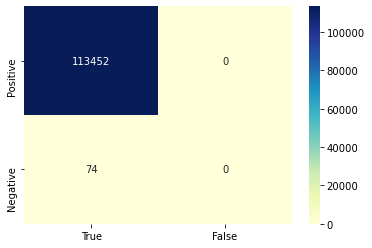

In [38]:
cm_matrix = pd.DataFrame(data=cm, columns=['True', 'False'], 
                                 index=['Positive', 'Negative'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

# Nilai Akurasi

In [31]:
ac = accuracy_score(y_test, y_pred)
ac

0.9993481669397318